In [68]:
import pandas as pd

In [69]:
import numpy as np

In [70]:
import matplotlib.pyplot as plt

In [71]:
import seaborn as sns

In [72]:
import warnings

In [73]:
warnings.filterwarnings("ignore")

In [74]:
dfloan=pd.read_csv(R"C:\Users\ny691\OneDrive\Desktop\DATA SCIENCE NOTES\DATASETS\MECHINE LEARNING\Classification\train_u6lujuX_CVtuZ9i (1).csv")

In [75]:
dfloan

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [76]:
dfloan.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

### Feature selection

In [77]:
dfloan.drop("Loan_ID",axis=1,inplace=True)

### Checking Nan

In [78]:
dfloan["Dependents"].mode()

0    0
Name: Dependents, dtype: object

In [79]:
dfloan.isna().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

### Dtypes

In [80]:
dfloan.dtypes

Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

### Nan filling

In [81]:
incol=dfloan.drop("Loan_Status",axis=1).columns

In [82]:
incol

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [83]:
dfloan["Dependents"].dtype

dtype('O')

In [84]:
dfloan["Dependents"].replace("[^0-9]","",regex=True)

0      0
1      1
2      0
3      0
4      0
      ..
609    0
610    3
611    1
612    2
613    0
Name: Dependents, Length: 614, dtype: object

In [85]:
dfloan["Dependents"]=dfloan["Dependents"].replace("[^0-9]","",regex=True)

In [86]:
dfloan["Gender"].fillna(dfloan["Gender"].mode()[0],inplace=True)

In [87]:
for i in incol:
    print("Column Name : ",i)
    if dfloan[i].isna().sum()!=0:
        print("Nan are There")
        if dfloan[i].dtype!="object":
            dfloan[i].fillna(dfloan[i].mean(),inplace=True)
            
        else:
            dfloan[i]=dfloan[i].fillna(dfloan[i].mode()[0])
    else:
        print("No Nan Are There")

Column Name :  Gender
No Nan Are There
Column Name :  Married
Nan are There
Column Name :  Dependents
Nan are There
Column Name :  Education
No Nan Are There
Column Name :  Self_Employed
Nan are There
Column Name :  ApplicantIncome
No Nan Are There
Column Name :  CoapplicantIncome
No Nan Are There
Column Name :  LoanAmount
Nan are There
Column Name :  Loan_Amount_Term
Nan are There
Column Name :  Credit_History
Nan are There
Column Name :  Property_Area
No Nan Are There


### Revaliadate Nan

In [88]:
dfloan.isna().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [89]:
dfloan.dtypes

Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [90]:
dfloan["Dependents"]=dfloan["Dependents"].astype("int")

### Error Detection

<AxesSubplot:>

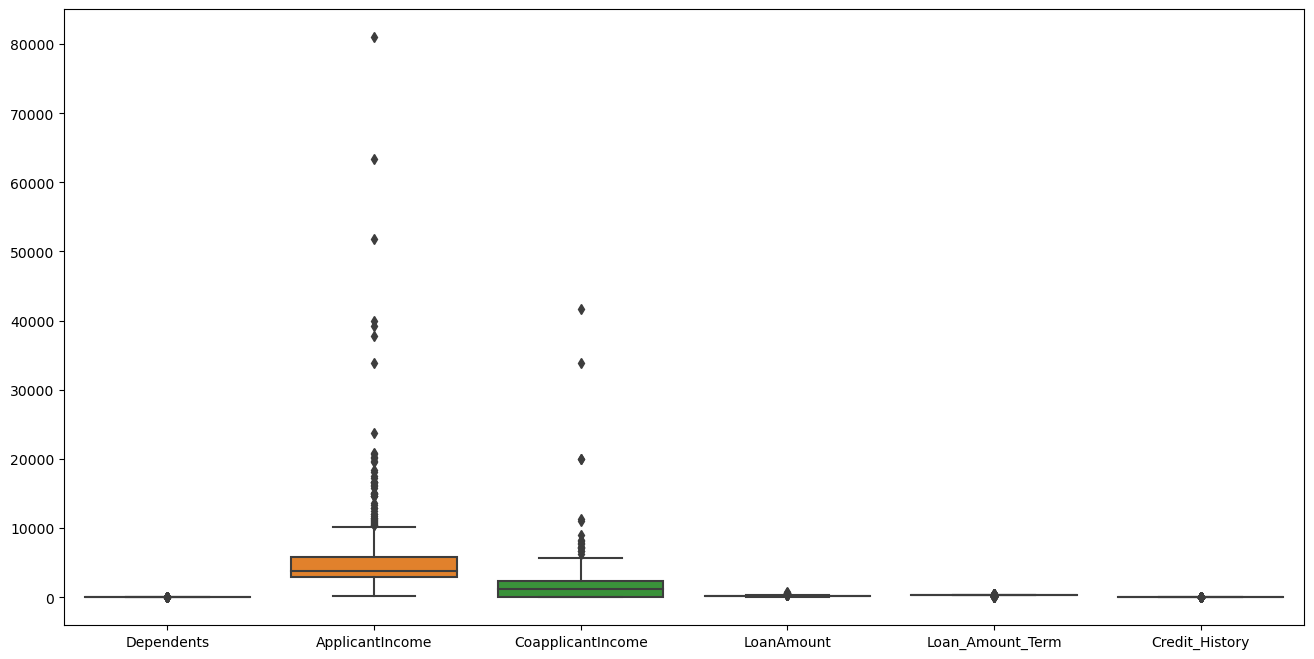

In [91]:
plt.figure(figsize=(16,8))
sns.boxplot(data=dfloan)

Column Name : Gender
Column Name : Married
Column Name : Dependents


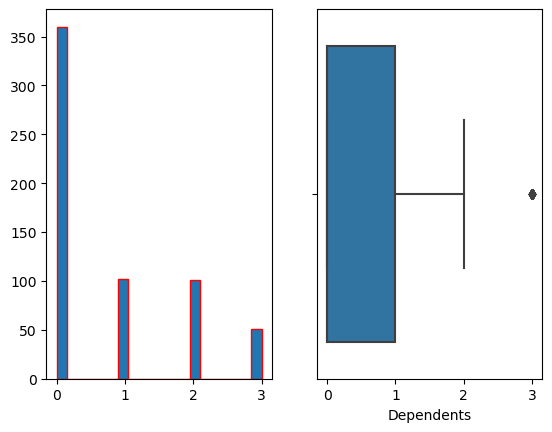

It is a Skew Distribution => IQR Method
count    614.000000
mean       0.744300
std        1.009623
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        3.000000
Name: Dependents, dtype: float64
Lower limit : -1.5
Upper limit : 2.5
Errors Are There
Column Name : Education
Column Name : Self_Employed
Column Name : ApplicantIncome


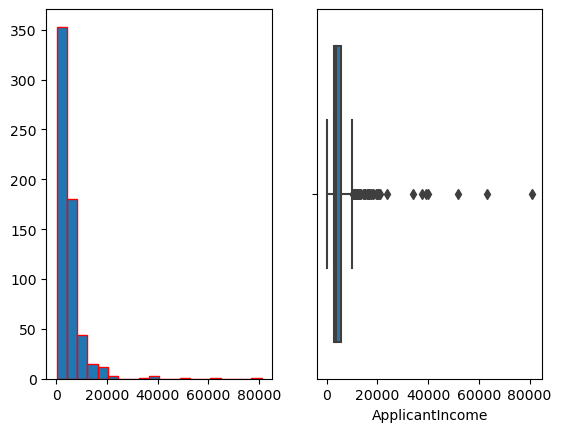

It is a Skew Distribution => IQR Method
count      614.000000
mean      5403.459283
std       6109.041673
min        150.000000
25%       2877.500000
50%       3812.500000
75%       5795.000000
max      81000.000000
Name: ApplicantIncome, dtype: float64
Lower limit : -1498.75
Upper limit : 10171.25
Errors Are There
Column Name : CoapplicantIncome


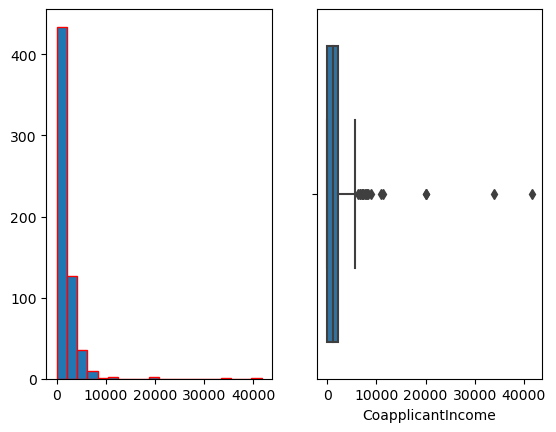

It is a Skew Distribution => IQR Method
count      614.000000
mean      1621.245798
std       2926.248369
min          0.000000
25%          0.000000
50%       1188.500000
75%       2297.250000
max      41667.000000
Name: CoapplicantIncome, dtype: float64
Lower limit : -3445.875
Upper limit : 5743.125
Errors Are There
Column Name : LoanAmount


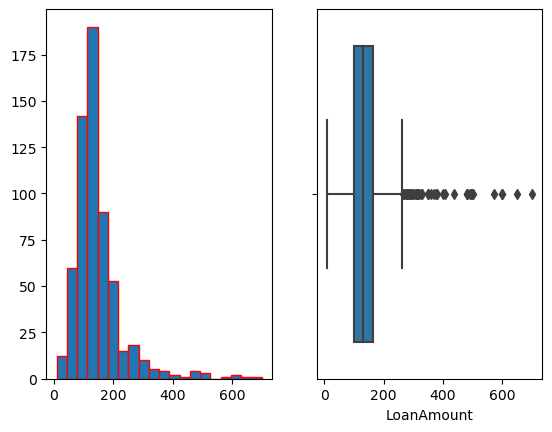

It is a Skew Distribution => IQR Method
count    614.000000
mean     146.412162
std       84.037468
min        9.000000
25%      100.250000
50%      129.000000
75%      164.750000
max      700.000000
Name: LoanAmount, dtype: float64
Lower limit : 3.5
Upper limit : 261.5
Errors Are There
Column Name : Loan_Amount_Term


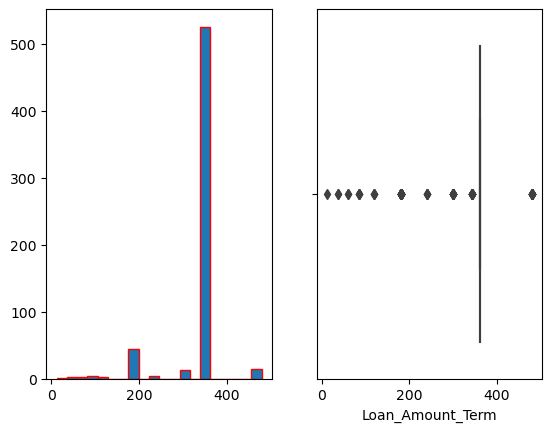

It is a Skew Distribution => IQR Method
count    614.000000
mean     342.000000
std       64.372489
min       12.000000
25%      360.000000
50%      360.000000
75%      360.000000
max      480.000000
Name: Loan_Amount_Term, dtype: float64
Lower limit : 360.0
Upper limit : 360.0
Errors Are There
Column Name : Credit_History


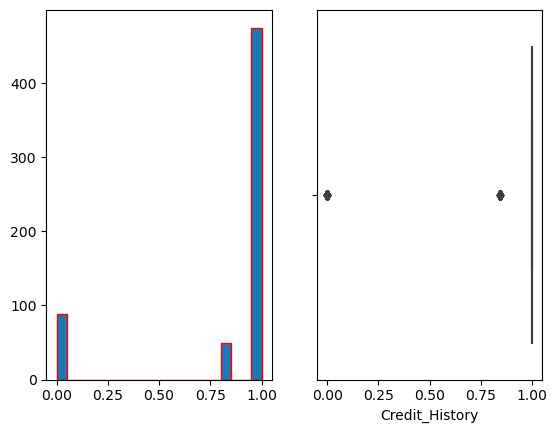

It is a Skew Distribution => IQR Method
count    614.000000
mean       0.842199
std        0.349681
min        0.000000
25%        1.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: Credit_History, dtype: float64
Lower limit : 1.0
Upper limit : 1.0
Errors Are There
Column Name : Property_Area


In [92]:
from scipy.stats import norm
for e in incol:
    print("Column Name :",e)
    if dfloan[e].dtype!="object":
        plt.subplot(1,2,1)
        plt.hist(dfloan[e],ec="r",bins=20)
        plt.subplot(1,2,2)
        sns.boxplot(dfloan[e])
        plt.show()
        if dfloan[e].skew().round()==0:
            print("It is a Normal distribution => Mean std Method")
            print(dfloan[e].describe())
            m=dfloan[e].mean()
            std=dfloan[e].std()
            lower=m-(3*std)
            upper=m+(3*std)
            print("Lower limit:",lower)
            print("Upper limit:",upper)
            if dfloan[e][(dfloan[e]<lower) | (dfloan[e]>upper)].count()==0:
                print("No Errors Are There")
            else:
                print("Errors Are There")
                dfloan[e]=dfloan[e].map(lambda f : m if f<lower else m if f>upper else f)
        else:
            print("It is a Skew Distribution => IQR Method")
            print(dfloan[e].describe())
            q1=dfloan[e].quantile(0.25)
            q3=dfloan[e].quantile(0.75)
            iqr=q3-q1
            lower1=q1-(1.5*iqr)
            upper1=q3+(1.5*iqr)
            print("Lower limit :",lower1)
            print("Upper limit :",upper1)
            if dfloan[e][(dfloan[e]<lower1) | (dfloan[e]>upper1)].count()==0:
                print("No Errors Are There")
            else:
                print("Errors Are There")
                dfloan[e]=dfloan[e].map(lambda c : lower1 if c<lower1 else upper1 if c>upper1 else c)
                
            
        